### phase 2 : Data understanding

In [286]:

import pandas as pd
import numpy as np
from math import radians, cos, sin, asin, sqrt
import seaborn as sns
import matplotlib.pyplot as plt




In [287]:
%matplotlib inline


In [288]:
#1 : Dataset overview
df = pd.read_csv(r"C:\Users\hanin\OneDrive\Desktop\Hanine Attia\projects\projet uber ML (CRISP-DM)\datauber.csv")
print("Dataset shape:", df.shape)

Dataset shape: (44377, 9)


In [289]:
df.head()


,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194.0,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1.0
1,27835199.0,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1.0
2,44984355.0,2009-08-24 21:45:00.00000061,12.9,NaN,-74.005043,40.740770,NaN,40.772647,1.0
3,25894730.0,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,NaN,-73.965316,40.803349,3.0
4,17610152.0,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,NaN,40.744085,-73.973082,NaN,5.0


In [290]:
df.info

<bound method DataFrame.info of        Unnamed: 0                            key  fare_amount  \
0      24238194.0    2015-05-07 19:52:06.0000003          7.5   
1      27835199.0    2009-07-17 20:04:56.0000002          7.7   
2      44984355.0   2009-08-24 21:45:00.00000061         12.9   
3      25894730.0    2009-06-26 08:22:21.0000001          5.3   
4      17610152.0  2014-08-28 17:47:00.000000188         16.0   
...           ...                            ...          ...   
44372  35522961.0    2013-09-28 01:30:18.0000001         21.5   
44373  34717029.0    2014-03-28 19:28:34.0000005          5.0   
44374  51028248.0    2011-03-30 12:54:23.0000005          9.3   
44375  50834096.0                            NaN          4.9   
44376  15145716.0    2012-07-12 00:59:02.0000002          3.3   

               pickup_datetime  pickup_longitude  pickup_latitude  \
0      2015-05-07 19:52:06 UTC        -73.999817        40.738354   
1      2009-07-17 20:04:56 UTC        -73.994355 

In [291]:
# Variable Types Identification
print("Variable Types in the Dataset:")
variable_types = df.dtypes
display(variable_types)

Variable Types in the Dataset:


Unnamed: 0           float64
key                   object
fare_amount          float64
pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count      float64
dtype: object

In [292]:
type_summary = df.dtypes.value_counts()
print("Summary of Variable Types:")
display(type_summary)

Summary of Variable Types:


float64    7
object     2
Name: count, dtype: int64

## Description 
The dataset contains 44,377 rows and 9 main columns:
- `Unnamed: 0`: numeric identifier (not useful → will be removed).
- `key`: unique trip identifier.
- `fare_amount`
- `pickup_datetime`: date and time when the trip started.
- `pickup_longitude`, `pickup_latitude`: pickup GPS coordinates.
- `dropoff_longitude`, `dropoff_latitude`: dropoff GPS coordinates.
- `passenger_count`: number of passengers.

In [294]:
#2 :statistics / Abnormal values 
display(df.describe())


,Unnamed: 0,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,4.224300e+04,42217.000000,42183.000000,42130.000000,42183.000000,42119.000000,42159.000000
mean,2.767290e+07,11.409233,-72.568666,39.948790,-72.588555,39.957229,1.677720
std,1.602678e+07,10.091979,10.776933,6.006307,10.684628,5.962407,1.296484
min,4.800000e+01,0.000000,-748.016667,-74.015515,-737.916665,-74.008745,0.000000
25%,1.372484e+07,6.000000,-73.992075,40.734808,-73.991496,40.733766,1.000000
50%,2.765192e+07,8.500000,-73.981857,40.752503,-73.980170,40.752910,1.000000
75%,4.151020e+07,12.600000,-73.967187,40.767077,-73.963738,40.768162,2.000000
max,5.542169e+07,350.000000,40.774042,45.031653,40.828377,45.031598,6.000000


## Abnormal values:
-fare_amount : min=0, max=350 (Fares equal to 0 or unusually high fares are errors).
-passenger_count : ranges from 0 to 6 (The number of passengers ranges from 0 to 6. Trips with 0 passengers are invalid).
-pickup_longitude : min=-748 (error longitudes should be between -180 and 180).

In [296]:
print("Number of negative or zero fares:", (df['fare_amount'] <= 0).sum())
print("Number of trips with 0 passengers:", (df['passenger_count'] == 0).sum())
print("Number of invalid pickup longitudes:", (~df['pickup_longitude'].between(-180,180)).sum())


Number of negative or zero fares: 2
Number of trips with 0 passengers: 137
Number of invalid pickup longitudes: 2195


## Interpretation
We can see there are invalid fares, passenger counts, and GPS coordinates.


In [298]:
#3 : Missing values
display(df.isnull().sum())


Unnamed: 0           2134
key                  2234
fare_amount          2160
pickup_datetime      2283
pickup_longitude     2194
pickup_latitude      2247
dropoff_longitude    2194
dropoff_latitude     2258
passenger_count      2218
dtype: int64

In [299]:
total_missing_values = df.isnull().sum().sum()
print(f"Total Number of Missing values : {total_missing_values}")

Total Number of Missing values : 19922


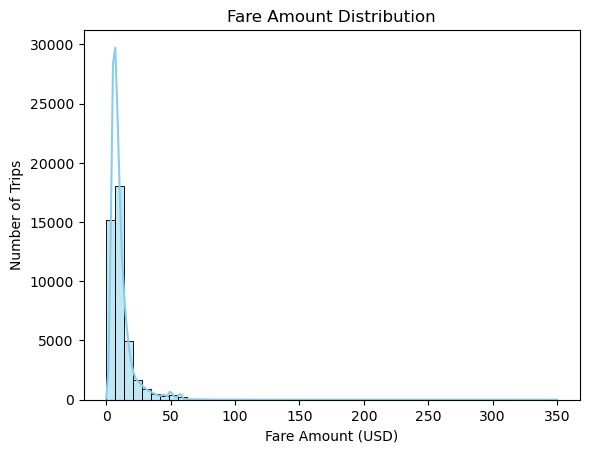

In [300]:
# Histogrammes:
# fare_amount Distribution
sns.histplot(df['fare_amount'], bins=50, kde=True, color='skyblue')
plt.title('Fare Amount Distribution')
plt.xlabel('Fare Amount (USD)')
plt.ylabel('Number of Trips')
plt.show()

## Interpretation:
The histogram shows that most fares are between 5 and 20 USD.  
There are some extremely low fares (0 USD) and some very high fares (>100 USD), which are likely outliers or data entry errors.  

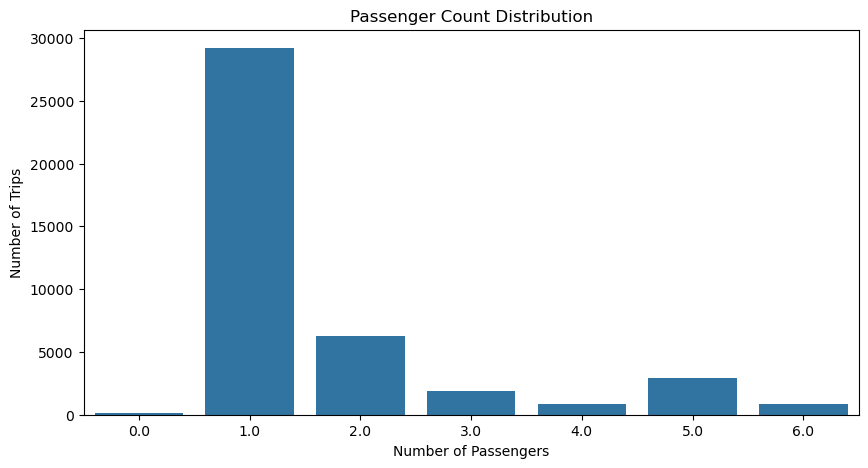

In [302]:
#passenger_count Distribution

plt.figure(figsize=(10,5))
sns.countplot(x='passenger_count', data=df)
plt.title('Passenger Count Distribution')
plt.xlabel('Number of Passengers')
plt.ylabel('Number of Trips')
plt.show()

## Interpretation:
Most trips have 1 or 2 passengers.  
There are a few trips with 0 passengers or more than 4, which are inconsistent and indicate errors in the dataset.

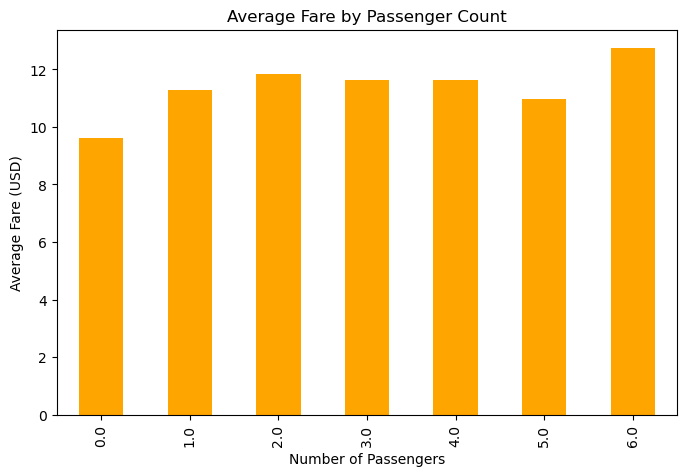

In [304]:
# Average Fare by Passenger Count
passenger_fares = df.groupby("passenger_count")["fare_amount"].mean()

plt.figure(figsize=(8,5))
passenger_fares.plot(kind="bar", color='orange')
plt.xlabel("Number of Passengers")
plt.ylabel("Average Fare (USD)")
plt.title("Average Fare by Passenger Count")
plt.show()


## Interpretation:
The average fare generally increases with the number of passengers, which is expected.  
Trips with 0 passengers show unusual average fares, confirming that these rows are likely errors

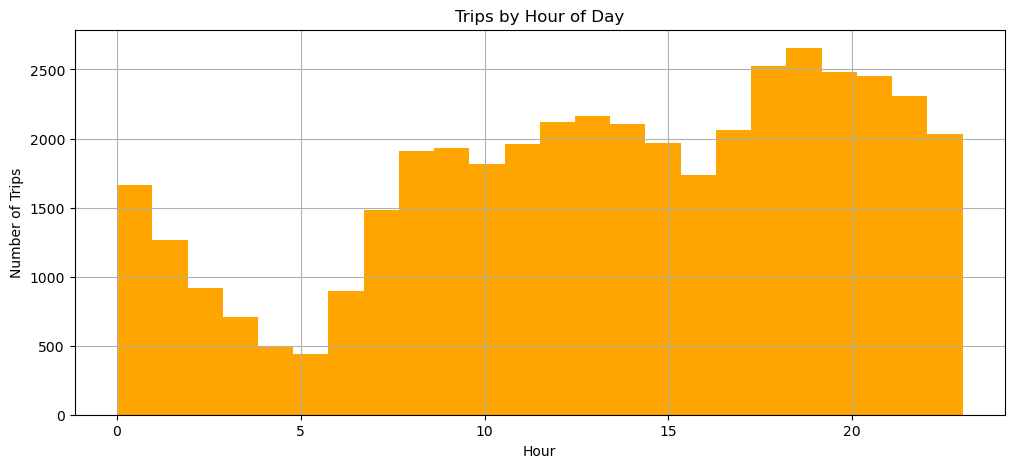

In [306]:
# Pickup datetime analysis
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'], errors='coerce')
plt.figure(figsize=(12,5))
df['pickup_datetime'].dt.hour.hist(bins=24, color='orange')
plt.title('Trips by Hour of Day')
plt.xlabel('Hour')
plt.ylabel('Number of Trips')
plt.show()

## Interpretation:
Most trips occur between 8 AM and 8 PM, with peaks during morning and evening rush hours.  
There are very few trips late at night (0-5 AM).  

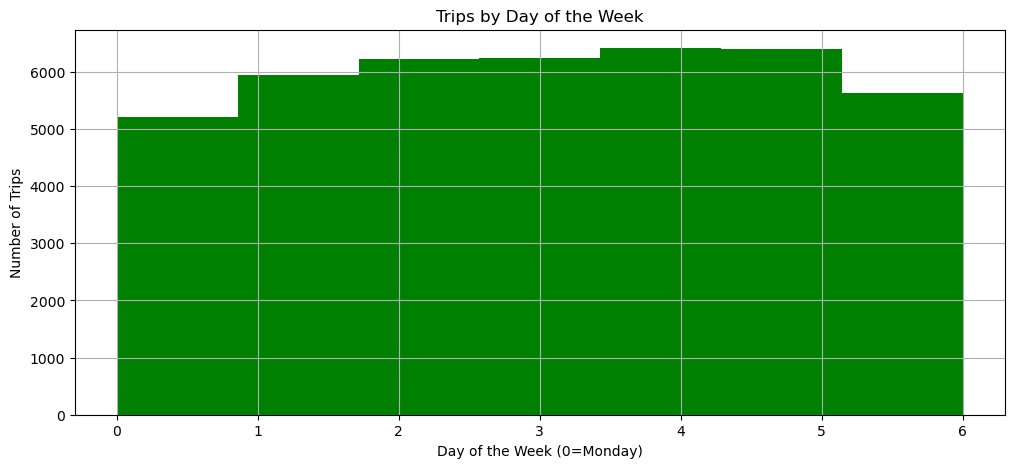

In [308]:
#Trips by Day of the Week
plt.figure(figsize=(12,5))
df['pickup_datetime'].dt.dayofweek.hist(bins=7, color='green')
plt.title('Trips by Day of the Week')
plt.xlabel('Day of the Week (0=Monday)')
plt.ylabel('Number of Trips')
plt.show()

## Interpretation: 
Trips are fairly evenly distributed across weekdays.  
Slightly fewer trips occur on weekends. 

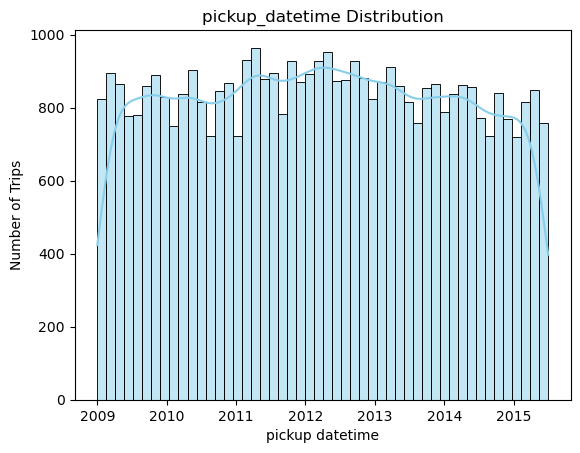

In [310]:
# pickup_datetime Distribution
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])
sns.histplot(df['pickup_datetime'], bins=50, kde=True, color='skyblue')
plt.title('pickup_datetime Distribution')
plt.xlabel('pickup datetime')
plt.ylabel('Number of Trips')
plt.show()

## Interpretation :
The pickup datetime distribution shows that Uber trips increased steadily from 2009 to 2015, reflecting growing demand and expanding service over time.

In [312]:
df["year"]=df["pickup_datetime"].dt.year
df[df["year"]>2025].count()

Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
year                 0
dtype: int64

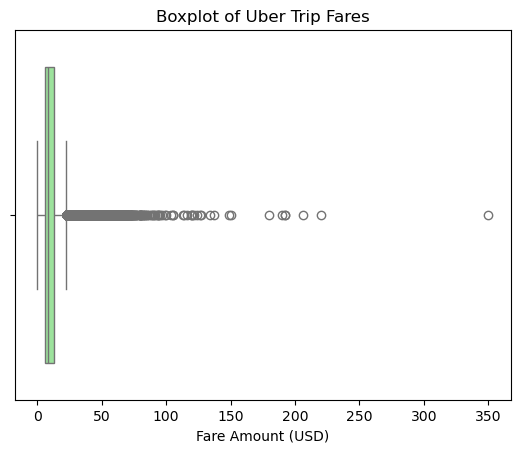

In [313]:
# Boxplots
# Boxplot of Uber Trip Fares
sns.boxplot(x=df['fare_amount'], color='lightgreen')
plt.title('Boxplot of Uber Trip Fares')
plt.xlabel('Fare Amount (USD)')
plt.show()

## Interpretation: 
Outliers with extremely high fares are visible. Median fare is around 12-15 USD.


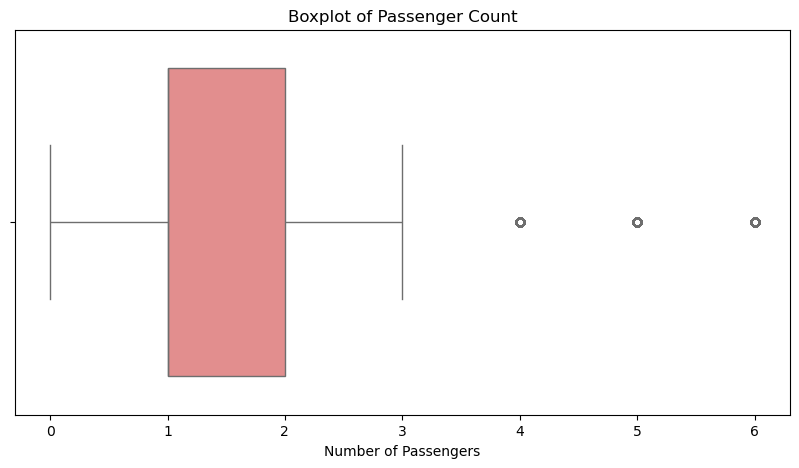

In [315]:
#Boxplot of Passenger Count
plt.figure(figsize=(10,5))
sns.boxplot(x=df['passenger_count'], color='lightcoral')
plt.title('Boxplot of Passenger Count')
plt.xlabel('Number of Passengers')
plt.show()


## Interpretation:
Most trips have 1 or 2 passengers. Zero passengers are considered errors and will be removed later.
